In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

In [2]:
filepath = "../Data Preprocessing/iot23_combined.csv"
df = pd.read_csv(filepath)
del df['Unnamed: 0']
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444669,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
1444670,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
1444671,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
1444672,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0


In [3]:
df['label'].value_counts()

PartOfAHorizontalPortScan     825939
Okiru                         262690
Benign                        197809
DDoS                          138777
C&C                            15100
Attack                          3915
C&C-HeartBeat                    349
C&C-FileDownload                  43
C&C-Torii                         30
FileDownload                      13
C&C-HeartBeat-FileDownload         8
C&C-Mirai                          1
Name: label, dtype: int64

In [4]:
df.columns

Index(['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'proto_icmp',
       'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ',
       'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR',
       'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
       'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR'],
      dtype='object')

In [5]:
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]
Y = df['label']

In [6]:
scaler = MinMaxScaler()
scaler.fit(X)
normalized_x = scaler.transform(X)
normalized_x

array([[8.16450401e-05, 5.73121586e-10, 8.57558209e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.04174057e-05, 5.73121586e-10, 8.57558209e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.04174057e-05, 5.73121586e-10, 8.57558209e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.04174057e-05, 5.73121586e-10, 8.57558209e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.04174057e-05, 5.73121586e-10, 8.57558209e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.04174057e-05, 5.73121586e-10, 8.57558209e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(normalized_x, Y, random_state=100, test_size=0.2)

In [8]:
tuned_parameters  = {
    "var_smoothing": np.logspace(start=-12.0, stop=0.0, num=13**2, base=10.0)
}
print(tuned_parameters)

{'var_smoothing': array([1.00000000e-12, 1.17876863e-12, 1.38949549e-12, 1.63789371e-12,
       1.93069773e-12, 2.27584593e-12, 2.68269580e-12, 3.16227766e-12,
       3.72759372e-12, 4.39397056e-12, 5.17947468e-12, 6.10540230e-12,
       7.19685673e-12, 8.48342898e-12, 1.00000000e-11, 1.17876863e-11,
       1.38949549e-11, 1.63789371e-11, 1.93069773e-11, 2.27584593e-11,
       2.68269580e-11, 3.16227766e-11, 3.72759372e-11, 4.39397056e-11,
       5.17947468e-11, 6.10540230e-11, 7.19685673e-11, 8.48342898e-11,
       1.00000000e-10, 1.17876863e-10, 1.38949549e-10, 1.63789371e-10,
       1.93069773e-10, 2.27584593e-10, 2.68269580e-10, 3.16227766e-10,
       3.72759372e-10, 4.39397056e-10, 5.17947468e-10, 6.10540230e-10,
       7.19685673e-10, 8.48342898e-10, 1.00000000e-09, 1.17876863e-09,
       1.38949549e-09, 1.63789371e-09, 1.93069773e-09, 2.27584593e-09,
       2.68269580e-09, 3.16227766e-09, 3.72759372e-09, 4.39397056e-09,
       5.17947468e-09, 6.10540230e-09, 7.19685673e-09, 8.48

In [9]:
clf = GridSearchCV(GaussianNB(), tuned_parameters, scoring="accuracy", n_jobs=-1, verbose=1)
clf.fit(X_train, Y_train)

Fitting 5 folds for each of 169 candidates, totalling 845 fits


/Users/marcelocysneiros/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e-12, 1.17876863e-12, 1.38949549e-12, 1.63789371e-12,
       1.93069773e-12, 2.27584593e-12, 2.68269580e-12, 3.16227766e-12,
       3.72759372e-12, 4.39397056e-12, 5.17947468e-12, 6.10540230e-12,
       7.19685673e-12, 8.48342898e-12, 1.00000000e-11, 1.17876863e-11,
       1.38949549e-11, 1.63789371e-11...
       1.93069773e-02, 2.27584593e-02, 2.68269580e-02, 3.16227766e-02,
       3.72759372e-02, 4.39397056e-02, 5.17947468e-02, 6.10540230e-02,
       7.19685673e-02, 8.48342898e-02, 1.00000000e-01, 1.17876863e-01,
       1.38949549e-01, 1.63789371e-01, 1.93069773e-01, 2.27584593e-01,
       2.68269580e-01, 3.16227766e-01, 3.72759372e-01, 4.39397056e-01,
       5.17947468e-01, 6.10540230e-01, 7.19685673e-01, 8.48342898e-01,
       1.00000000e+00])},
             scoring='accuracy', verbose=1)

In [10]:
print("Best score found on development set:", clf.best_score_)

print("Best parameters set found on development set:", clf.best_params_)

print("\nRefit time (in seconds):", clf.refit_time_)

print("\nGrid scores on development set:")
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
params = clf.cv_results_["params"]
for mean, std, param in zip(means, stds, params):
    print("%0.3f (+/-%0.06f) for %r" % (mean, std * 2, param))

Best score found on development set: 0.6922540470060106
Best parameters set found on development set: {'var_smoothing': 0.011787686347935866}

Refit time (in seconds): 4.008146286010742

Grid scores on development set:
0.302 (+/-0.000517) for {'var_smoothing': 1e-12}
0.302 (+/-0.000517) for {'var_smoothing': 1.1787686347935867e-12}
0.302 (+/-0.000517) for {'var_smoothing': 1.3894954943731361e-12}
0.302 (+/-0.000517) for {'var_smoothing': 1.6378937069540613e-12}
0.302 (+/-0.000517) for {'var_smoothing': 1.9306977288832537e-12}
0.302 (+/-0.000517) for {'var_smoothing': 2.275845926074791e-12}
0.302 (+/-0.000517) for {'var_smoothing': 2.6826957952797272e-12}
0.302 (+/-0.000517) for {'var_smoothing': 3.1622776601683794e-12}
0.302 (+/-0.000517) for {'var_smoothing': 3.727593720314938e-12}
0.302 (+/-0.000517) for {'var_smoothing': 4.393970560760786e-12}
0.302 (+/-0.000519) for {'var_smoothing': 5.179474679231202e-12}
0.302 (+/-0.000519) for {'var_smoothing': 6.105402296585339e-12}
0.302 (+/-0

0.25 0.75


Text(0.5, 1.0, 'GridSearchCV results')

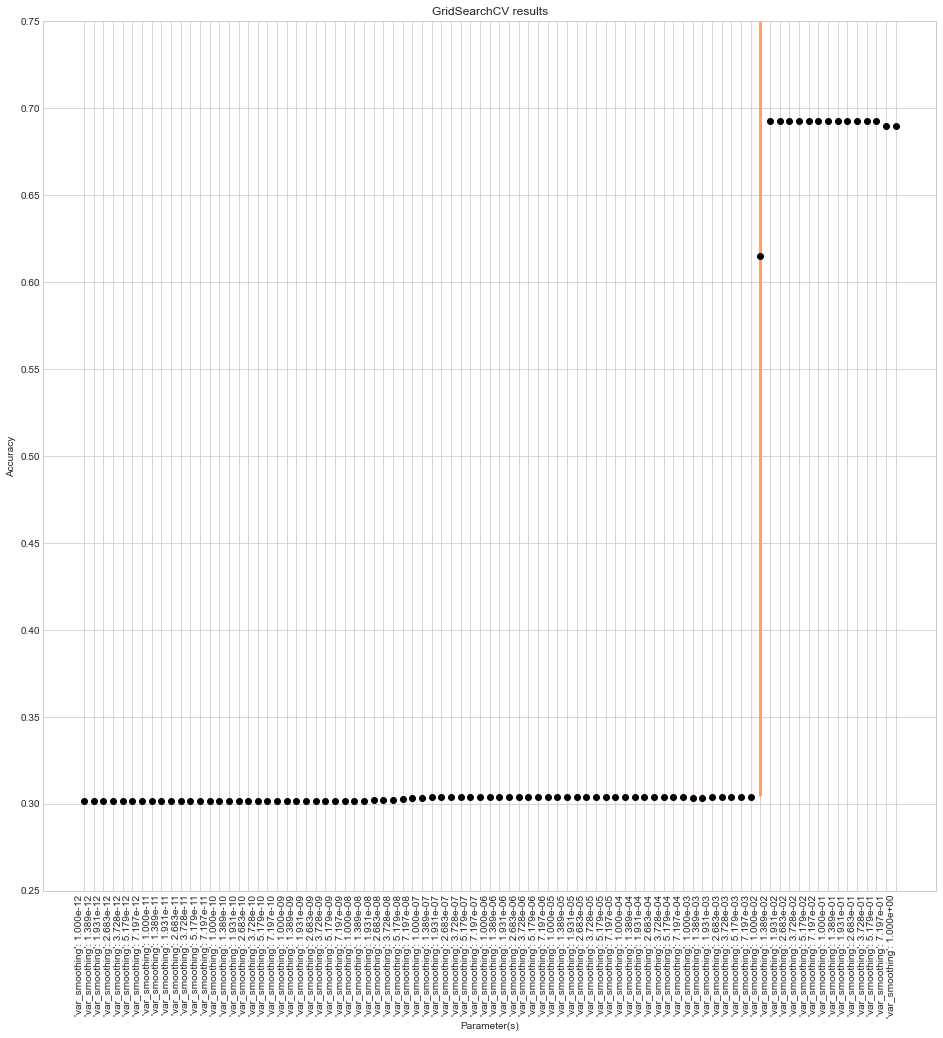

In [21]:
x = []
for dic in params:
    for i in dic:
        x.append(f"'{i}': {dic[i]:0.3e}")
y = means
err = stds * 2
step = 2

fig, ax = plt.subplots(figsize=(16,16))
plt.style.use('seaborn-whitegrid')
plt.errorbar(x[::step], y[::step], yerr=err[::step], fmt='o', color='black', ecolor='lightsalmon', elinewidth=3, capsize=0);
plt.xlabel('Parameter(s)')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Accuracy')
min_y = np.floor(10*np.min(y[::step]))/10 - 0.05
max_y = np.ceil(10*np.max(y[::step]))/10 + 0.05
print(min_y,max_y)

plt.ylim(min_y,max_y)
plt.yticks(np.linspace(min_y, max_y, int(1+(max_y-min_y)*10*2)))
plt.title('GridSearchCV results')

In [12]:
print("Detailed classification report:")
print(" - The model is trained on the full development set.")
print(" - The scores are computed on the full evaluation set.")
Y_true, Y_pred = Y_test, clf.predict(X_test)
print(classification_report(Y_true, Y_pred))

Detailed classification report:
 - The model is trained on the full development set.
 - The scores are computed on the full evaluation set.


/Users/marcelocysneiros/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marcelocysneiros/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marcelocysneiros/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users

                            precision    recall  f1-score   support

                    Attack       0.76      0.97      0.85       764
                    Benign       1.00      0.29      0.45     39944
                       C&C       0.66      0.11      0.18      2960
          C&C-FileDownload       0.40      0.44      0.42         9
             C&C-HeartBeat       0.04      0.48      0.08        60
C&C-HeartBeat-FileDownload       0.00      0.00      0.00         1
                 C&C-Mirai       0.00      0.00      0.00         0
                 C&C-Torii       0.08      0.20      0.12         5
                      DDoS       1.00      0.82      0.90     27578
              FileDownload       0.00      0.00      0.00         2
                     Okiru       0.00      0.00      0.00     52275
 PartOfAHorizontalPortScan       0.65      1.00      0.79    165337

                  accuracy                           0.69    288935
                 macro avg       0.38      0.3

/Users/marcelocysneiros/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marcelocysneiros/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


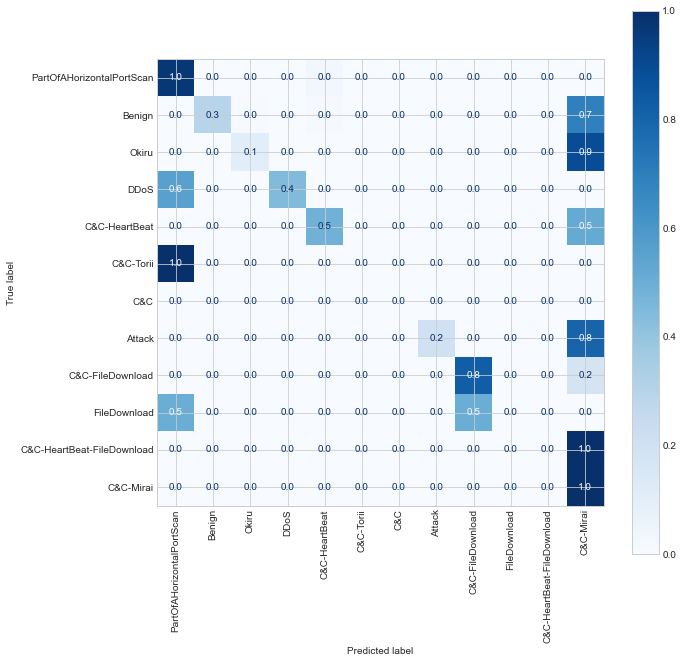

In [13]:
cm = confusion_matrix(Y_true, Y_pred, normalize='true')
disp = ConfusionMatrixDisplay(cm, display_labels=df['label'].unique())

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,
          cmap=plt.cm.Blues,
          xticks_rotation=90,
          values_format='.1f')